In [2]:
print("Hello world")

Hello world


In [3]:
import os
import keras 
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [4]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

- Creating an Encoder Object:
  - An instance of the OneHotEncoder class is created and stored in the variable `encoder`.

- Fitting the Encoder:
  - The `fit()` method is used to teach the encoder about the categories it will encode.
  - The data [[0], [1]] is provided, indicating two categories: 0 and 1.

- Mapping Categories to Labels:
  - Categories 0 and 1 are labeled as "Tumor" and "Normal" respectively.

- One-Hot Encoding:
  - One-hot encoding converts categorical data into binary vectors.
  - Each category gets its binary representation with one "hot" (1) and all others "cold" (0).

- Usage:
  - After fitting with [[0], [1]], the encoder can transform categorical data.
  - For example, [[0]] becomes [[1, 0]], and [[1]] becomes [[0, 1]].


In [5]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:

paths = []
for r, d, f in os.walk(r"/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [8]:
result = np.array(result)
result = result.reshape(139,2)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [29]:
from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(128, 128, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())


/Users/kartiksethi/Desktop/Mritumor/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,370,562 (257.00 MB)

 Trainable params: 67,370,562 (257.00 MB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
y_train.shape

(111, 2)

In [32]:
history = model.fit(x_train, y_train, epochs=30, batch_size=40, verbose=1, validation_split=0.1)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5485 - loss: 961.7480 - val_accuracy: 0.4167 - val_loss: 60.1734
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5913 - loss: 27.5313 - val_accuracy: 0.5833 - val_loss: 12.2410
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5021 - loss: 7.6085 - val_accuracy: 0.6667 - val_loss: 0.6900
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6985 - loss: 0.6161 - val_accuracy: 0.7500 - val_loss: 0.5400
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6992 - loss: 0.5224 - val_accuracy: 0.6667 - val_loss: 0.5121
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7908 - loss: 0.5043 - val_accuracy: 0.8333 - val_loss: 0.5198
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7187 - loss: 0.4885 - val_accuracy: 0.7500 - val_loss: 0.5051
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7947 - loss: 0.4565 - val_accuracy: 0.6667 - val_loss: 0.4367
Epo

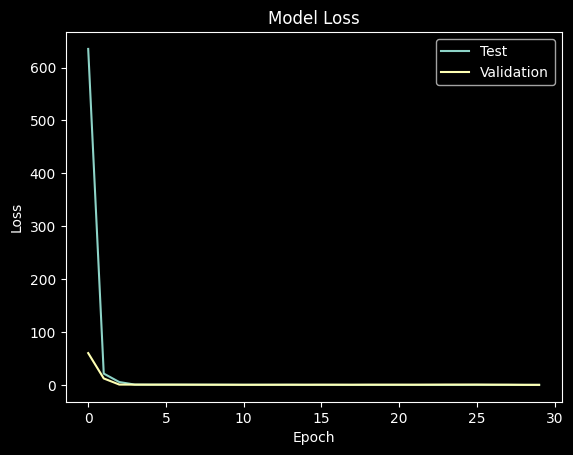

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

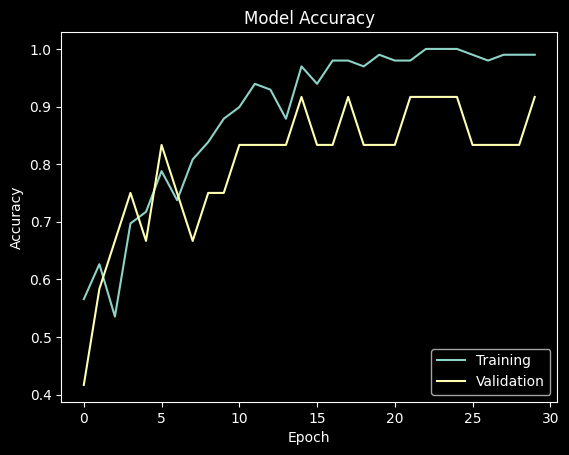

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


In [35]:
# Evaluate the model
test_loss = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step - accuracy: 0.7143 - loss: 2.3043
Test Loss: [2.3042984008789062, 0.7142857313156128]


In [36]:
from sklearn.metrics import accuracy_score

# Predict probabilities for test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute test accuracy
test_accuracy = accuracy_score(y_true, y_pred)

print("Test Accuracy:", test_accuracy*100)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step
Test Accuracy: 71.42857142857143


In [37]:
from sklearn.metrics import f1_score

# Compute F1-score
f1 = f1_score(y_true, y_pred)

print("F1 Score:", f1)


F1 Score: 0.6


In [38]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [39]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

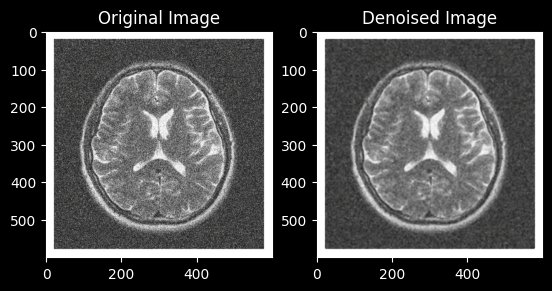

Execution time for denoising: 0.022051095962524414 seconds


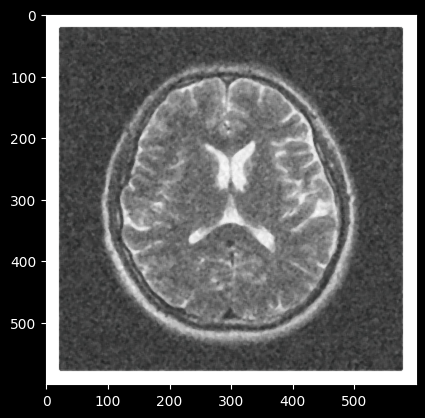

Execution time for classification: 0.1409459114074707 seconds
Confidence This Is Normal: 99.84440207481384%


In [50]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import display
import time
from PIL import Image

# Define the function to get the class name
def names(classification):
    if classification == 0:
        return "Tumor"
    elif classification == 1:
        return "Normal"
    else:
        return "Unknown"

# Read the model
# Assuming you have already loaded and compiled your Keras model and named it 'model'

# Define the paths to the images
image_paths = [
    '/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/blur/Brain.jpg'
]

# Loop through each image path
for image_path in image_paths:
    # Reading the image
    img = cv2.imread(image_path)

    # Denoising the image using median filter
    dst = cv2.medianBlur(img, 5)  # Adjust kernel size as needed

    start_time = time.time()

    # Plotting the original and denoised image
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    plt.title('Denoised Image')

    end_time = time.time()

    plt.show()
    execution_time = end_time - start_time
    print("Execution time for denoising:", execution_time, "seconds")

    # Reading the image for classification
    img = Image.open(image_path)
    x = np.array(img.resize((128,128)))
    x = x.reshape(1,128,128,3)
    
    start_time = time.time()

    # Predicting the class
    res = model.predict_on_batch(x)
    classification = np.argmax(res)

    end_time = time.time()

    # Displaying the image and prediction
    plt.imshow(dst)
    plt.show()

    execution_time = end_time - start_time
    print("Execution time for classification:", execution_time, "seconds")
    print("Confidence This Is " + names(classification) + ": " + str(res[0][classification]*100) + "%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


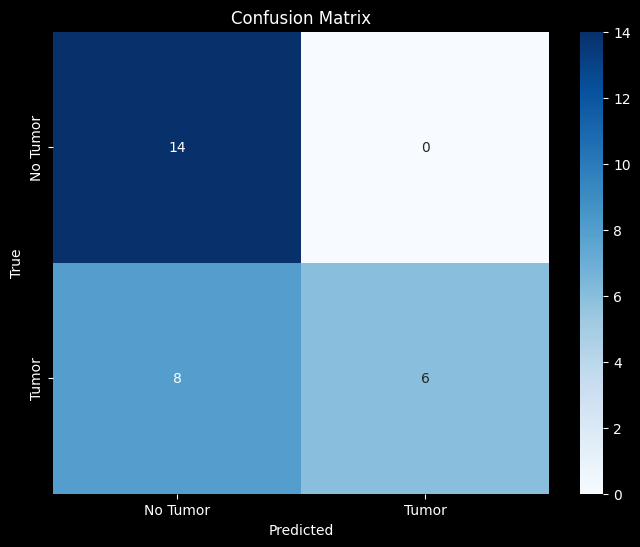

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Tumor', 'Tumor'], 
            yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


71.42857142857143


TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

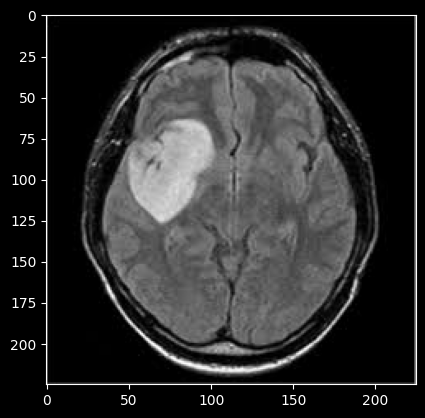

In [46]:
from matplotlib.pyplot import imshow
img = Image.open(r"/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/yes/Y4.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str((test_accuracy)*100))+ "accuracy it's"+ names(classification)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))
model.save('loc.keras') 

In [43]:
print("Example Predictions:")
for i in range(15):
    actual_class = "Tumor" if y_true[i] == 1 else "No Tumor"
    predicted_class = "Tumor" if y_pred[i] == 1 else "No Tumor"
    print(f"Example {i+1}: Actual - {actual_class}, Predicted - {predicted_class}, Probabilities: {y_pred_probs[i]}")


Example Predictions:
Example 1: Actual - No Tumor, Predicted - No Tumor, Probabilities: [9.9998534e-01 1.4620811e-05]
Example 2: Actual - Tumor, Predicted - No Tumor, Probabilities: [9.9997669e-01 2.3343031e-05]
Example 3: Actual - Tumor, Predicted - No Tumor, Probabilities: [0.99889016 0.00110985]
Example 4: Actual - Tumor, Predicted - No Tumor, Probabilities: [9.9997741e-01 2.2662563e-05]
Example 5: Actual - No Tumor, Predicted - No Tumor, Probabilities: [9.9983221e-01 1.6784164e-04]
Example 6: Actual - Tumor, Predicted - No Tumor, Probabilities: [0.9805696  0.01943046]
Example 7: Actual - No Tumor, Predicted - No Tumor, Probabilities: [0.9871082  0.01289186]
Example 8: Actual - Tumor, Predicted - Tumor, Probabilities: [1.3114806e-04 9.9986887e-01]
Example 9: Actual - Tumor, Predicted - No Tumor, Probabilities: [0.68412846 0.3158715 ]
Example 10: Actual - Tumor, Predicted - Tumor, Probabilities: [1.7134125e-29 1.0000000e+00]
Example 11: Actual - No Tumor, Predicted - No Tumor, Probab